# Descriptive Statistics

In [1]:
import re
import pandas as pd
import numpy as np


In [4]:
data = pd.read_csv('/Users/sylvia/Desktop/datasets/googleplaystore.csv')
data.shape

(10841, 13)

### Pleliminary data check
- Gives an idea if any quality issues in data e.g. Size 19M, Installs 10,000+ have some special symbols along with numbers
- About data types of different columns present in dataset.

In [14]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_numeric,Price_numeric
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000.0,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500000.0,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,5000000.0,0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,50000000.0,0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,100000.0,0.0


In [20]:
# To check type of data in price
data[data['Price'] != '0'].head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_numeric,Price_numeric
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up,100000.0,4.99


### Define Granularity of data
- Each row represents one application in google store

### Check for missing values

In [28]:
data.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
data.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


### To check if particular column can be considered as categorical or not - nunique() applied on each column

- Out of 10K data,  9660 values unique for App hence cannot be a categorical column.
- Out of 10K, 34 unique values hence categorical column.
- Rating/Size can be considered as numerical or categorical based on problem.
- Installs is numeric but has 22 unique values can be considered as categorical as well.


In [8]:
data.nunique()


App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

### Segregate different data types in dataset - Category, Numbers, Dates, Texts, Locations
So based on data type we can do appropriate analysis e.g. if text column text analytics, if location then geographical analysis etc

In [11]:
categories = ['Category', 'Installs', 'Type', 'Content Rating',
              'Genres', 'Android Ver']
numbers = ['Rating', 'Reviews', 'Installs_numeric', 'Price_numeric']
dates = ['Last Updated']
texts = ['App']
locations = []

### Clean Installs and Price column using Regular expressions

In [22]:
# To make Installs & Price as numeric column instead of keeping them as categorical columns.
# re.sub is used to replace occurences of a particular sub-string with another sub-string.

#e.g. 10000+ - need to remove +
data['Installs_numeric'] = data['Installs'].apply(
    lambda v: re.sub('[^0-9]', '', v)).replace('', None).astype(float)


#e.g. $4.99 - need to remove $
data['Price_numeric'] = pd.to_numeric(data['Price'].str.replace('[^0-9\.]',''),
                             errors='coerce')

/Users/sylvia/opt/anaconda3/envs/TF1/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':


### Summarize Categorical Columns

In [24]:
# Default function to summarize categorical columns on top of pandas describe for descriptive summary

def categories_descriptive(data, categories):
    summary = data[categories].describe()
    freq_perc = summary.loc['freq'] / data.shape[0] * 100
    freq_perc.name = 'freq_perc'
    summary = summary.append(freq_perc)
    
    nulls = data.shape[0] - summary.loc['count']
    nulls_perc = nulls / data.shape[0] * 100
    nulls_perc.name = 'missing_perc'
    summary = summary.append(nulls_perc)
    return summary

In [23]:
categories_descriptive(data, categories)

,Category,Installs,Type,Content Rating,Genres,Android Ver
count,10841,10841,10840,10840,10841,10838
unique,34,22,3,6,120,33
top,FAMILY,"1,000,000+",Free,Everyone,Tools,4.1 and up
freq,1972,1579,10039,8714,842,2451
freq_perc,18.190204,14.565077,92.602158,80.380039,7.766811,22.608615
missing_perc,0.0,0.0,0.009224,0.009224,0.0,0.027673


### Summarize Numerical Columns

In [35]:
data[numbers].describe()

,Rating,Installs_numeric,Price_numeric
count,9367.000000,1.084100e+04,10840.000000
mean,4.193338,1.546292e+07,1.027368
std,0.537431,8.502557e+07,15.949703
min,1.000000,0.000000e+00,0.000000
25%,4.000000,1.000000e+03,0.000000
50%,4.300000,1.000000e+05,0.000000
75%,4.500000,5.000000e+06,0.000000
max,19.000000,1.000000e+09,400.000000


**Analysis**
- Having a rating of 19 looks like an outlier. As seen below, only 1 row has 19 rating.
- From the boxplot we observe that 19 is a clear outlier & can be removed.

In [25]:
data[data['Rating'] == 19]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_numeric,Price_numeric
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN,100000.0,NaN


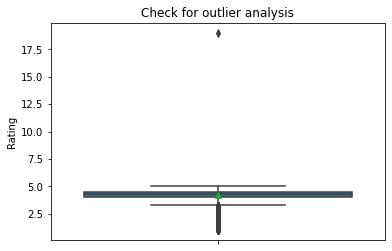

In [33]:
import seaborn as sns
bp = sns.boxplot(y = data['Rating'], showmeans = True)  
plt.title('Check for outlier analysis');

### Summarize Date Columns - change from object to datetime column

In [36]:
# looks like date is inetrprest as object by python
data['Last Updated'].head(1)

0    January 7, 2018
Name: Last Updated, dtype: object

In [37]:
data['Last Updated'] = pd.to_datetime(data['Last Updated'],
                                     format='%B %d, %Y',
                                     errors='coerce')
data['Last Updated'].head()

0   2018-01-07
1   2018-01-15
2   2018-08-01
3   2018-06-08
4   2018-06-20
Name: Last Updated, dtype: datetime64[ns]

Use describe() after changing to datetime datatype to get summary statistics.

In [38]:
data['Last Updated'].describe()

/Users/sylvia/opt/anaconda3/envs/TF1/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                   10840
unique                   1377
top       2018-08-03 00:00:00
freq                      326
first     2010-05-21 00:00:00
last      2018-08-08 00:00:00
Name: Last Updated, dtype: object

This is 8 years data so you can so year, month or day analysis as per problem.

In [41]:
data['Last Updated'].min(), data['Last Updated'].max()

(Timestamp('2010-05-21 00:00:00'), Timestamp('2018-08-08 00:00:00'))

In [42]:
data['Last Updated'].value_counts().head(10)
# date on which many applications got updated maybe new android version launched before that. 

2018-08-03    326
2018-08-02    304
2018-07-31    294
2018-08-01    285
2018-07-30    211
2018-07-25    164
2018-07-26    161
2018-08-06    158
2018-07-27    151
2018-07-24    148
Name: Last Updated, dtype: int64